In [513]:
import numpy as np
import matplotlib.pyplot as plt


with open('NLS_Group11.txt', 'r') as file:
    lines = file.readlines()
    i = 1  # Assuming the first line is header or to be skipped
    data = []
    # Read Class 1 data
    while i < 501:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i += 1
    class1 = np.array(data)
    data = []
    # Read Class 2 data
    while i < 1001:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i += 1
    class2 = np.array(data)
    data = []
    # Read Class 3 data
    while i < 1701:
        point = lines[i].split()
        data.append([float(point[0]), float(point[1])])
        i += 1
    class3 = np.array(data)

print("Class 1 sample data:", class1[:10])
print("Class 2 sample data:", class2[:10])
print("Class 3 sample data:", class3[:10])

Class 1 sample data: [[ 0.675839 -0.221109]
 [-0.544258 -0.513276]
 [ 0.522613 -0.499236]
 [ 0.49009  -0.346473]
 [ 0.50347  -0.432488]
 [ 0.606569 -0.143063]
 [-0.507774 -0.54321 ]
 [-0.660941 -0.149509]
 [ 0.690794 -0.006358]
 [-0.648933 -0.273169]]
Class 2 sample data: [[ 1.158298  0.613937]
 [ 1.377077  0.058263]
 [-1.044622 -1.05563 ]
 [ 1.118368  0.45561 ]
 [ 0.70017   1.329269]
 [ 1.522522  0.395424]
 [-1.378594  0.678167]
 [ 0.743791 -1.086453]
 [-0.446414  1.170552]
 [ 1.201436 -0.31672 ]]
Class 3 sample data: [[ 2.224947  1.261673]
 [ 1.615975  1.661882]
 [ 0.592875  2.360452]
 [-1.086213 -1.816503]
 [-2.083724  0.572567]
 [-1.10533  -2.120338]
 [ 1.692823  1.865969]
 [ 2.160815  1.192021]
 [-0.928189 -2.06303 ]
 [-2.01113  -1.371044]]


In [514]:
def split_train_test(data, train_ratio=0.7):
    np.random.shuffle(data)
    split_point = int(len(data) * train_ratio)
    return data[:split_point], data[split_point:]

train_data1, test_data1 = split_train_test(class1)
train_data2, test_data2 = split_train_test(class2)
train_data3, test_data3 = split_train_test(class3)
print(len(train_data1))

350


In [515]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    # Randomly select k unique points from the data as the initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def assign_clusters(data, centroids):
    # Assign each data point to the nearest centroid
    clusters = []
    for point in data:
        # Compute the Euclidean distance between the point and each centroid
        distances = np.linalg.norm(point - centroids, axis=1)
        # Assign the point to the cluster with the closest centroid
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Update centroids by computing the mean of points in each cluster
    centroids = []
    for i in range(k):
        # Get the points assigned to cluster i
        cluster_points = data[clusters == i]
        # Compute the mean of the points in the cluster
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = np.zeros(data.shape[1])
        centroids.append(new_centroid)
    return np.array(centroids)

def compute_distortion(data, centroids, clusters):
    # Compute the total distortion (sum of squared distances from each point to its centroid)
    distortion = 0
    for i, point in enumerate(data):
        centroid = centroids[clusters[i]]
        distortion += np.sum((point - centroid) ** 2)
    return distortion

def k_means_clustering(k, data, tolerance=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    # Initialize distortion to a large value
    previous_distortion = float('inf')
    
    while True:
        # Assign clusters based on current centroids
        clusters = assign_clusters(data, centroids)
        
        # Update centroids
        centroids = update_centroids(data, clusters, k)
        
        # Compute the current distortion
        current_distortion = compute_distortion(data, centroids, clusters)
        
        # Check if the change in distortion is below the threshold
        if np.abs(previous_distortion - current_distortion) < tolerance:
            break
        
        # Update the previous distortion
        previous_distortion = current_distortion
    
    return centroids, clusters

def plot_clusters(data, centroids, clusters):
    if len(data) != len(clusters):
        print(f"Error: Data size ({len(data)}) and clusters size ({len(clusters)}) do not match.")
        return

    plt.figure(figsize=(8,6))
    
    k = len(centroids)
    colors = [
    'r', 'g', 'b', 'y', 'c', 'm',
    'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 
    'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 
    'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 
    'darkviolet', 'dimgray', 'midnightblue', 'black', 'brown', 'maroon', 
    'sienna', 'darkblue', 'navy', 'midnightblue', 'indigo', 'purple', 
    'darkviolet', 'darkmagenta', 'darkorchid', 'mediumblue', 'royalblue', 
    'teal', 'darkcyan', 'darkturquoise', 'seagreen', 'forestgreen', 'green', 
    'darkgreen', 'olive', 'olivedrab', 'darkolivegreen', 'khaki', 'goldenrod', 
    'chocolate', 'saddlebrown', 'firebrick', 'darkred', 'crimson', 
    'orangered', 'tomato', 'coral', 'darkorange', 'gold', 
    'sienna', 'brown', 'burlywood', 'indianred'
    ]

    
    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x', label='Centroids')
    
    plt.title('K-Means Clustering with Distortion-based Convergence')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Enter K value  8


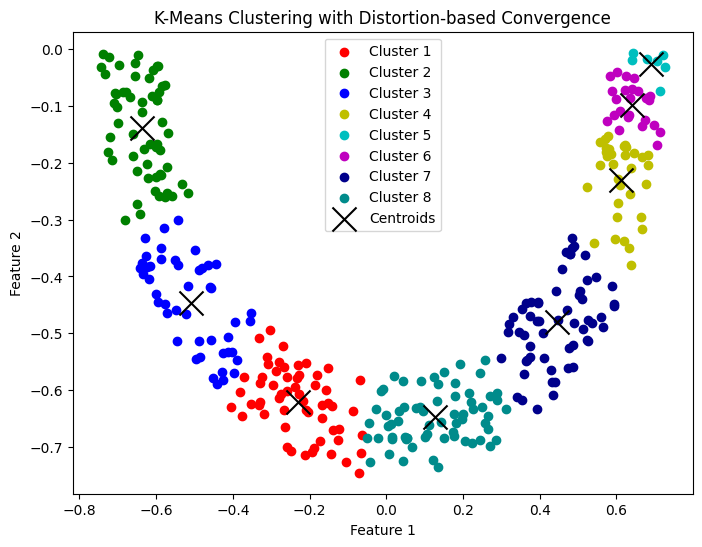

In [516]:
k=int(input("Enter K value "))
data1 =train_data1
centroids1, clusters1 = k_means_clustering(k, data1)
plot_clusters(data1, centroids1, clusters1)

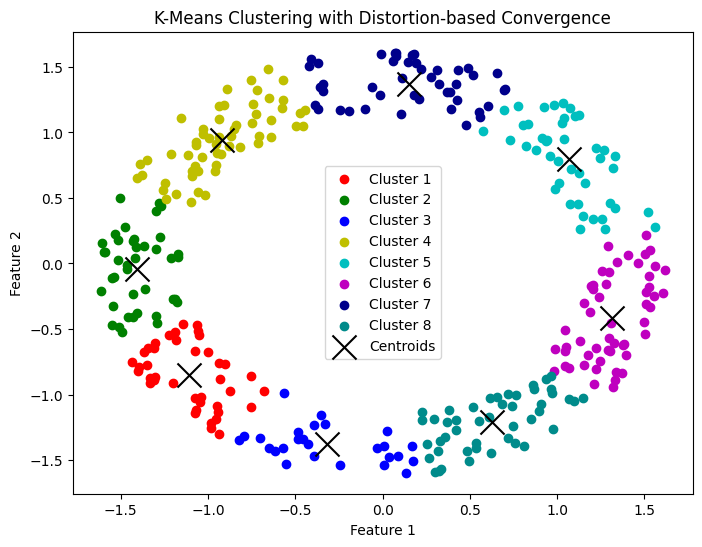

In [517]:
data2 =train_data2
centroids2, clusters2 = k_means_clustering(k, data2)
plot_clusters(data2, centroids2, clusters2)

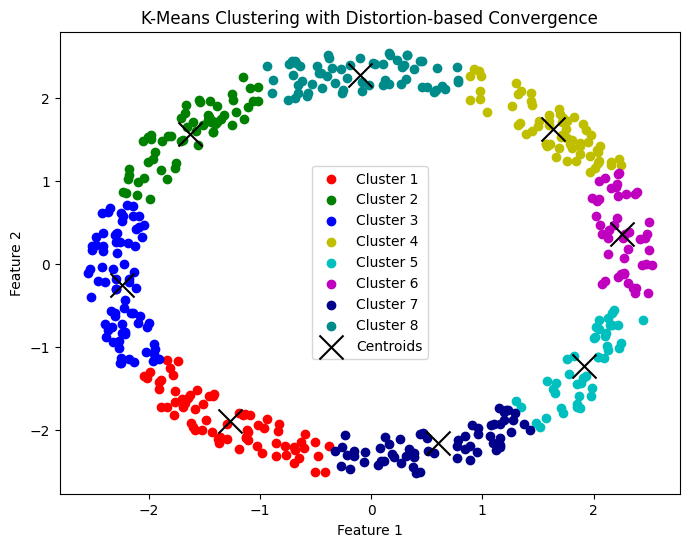

In [518]:
data3 =train_data3
centroids3, clusters3 = k_means_clustering(k, data3)
plot_clusters(data3, centroids3, clusters3)

In [519]:


def compute_cluster_covariance_and_weight(data, centroids, clusters):
    k = len(centroids)  # Number of clusters
    total_points = len(data) 
    
    covariance_matrices = []
    weights = []
    
    for i in range(k):
        cluster_points = data[clusters == i]
        num_points_in_cluster = len(cluster_points)
        
        if num_points_in_cluster > 1:
            cov_matrix = np.cov(cluster_points, rowvar=False)
        else:
            cov_matrix = np.zeros((data.shape[1], data.shape[1]))
        
        weight = num_points_in_cluster / total_points
        
        # Store the results
        covariance_matrices.append(cov_matrix)
        weights.append(weight)
    
    return covariance_matrices, weights

cov_matrices1, cluster_weights1 = compute_cluster_covariance_and_weight(data1, centroids1, clusters1)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices1, cluster_weights1)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights1)}")


Cluster 1:
Covariance Matrix:
[[ 0.00762559 -0.00234439]
 [-0.00234439  0.00340145]]
Weight: 0.1657142857142857

Cluster 2:
Covariance Matrix:
[[ 0.00316123 -0.00189866]
 [-0.00189866  0.00728688]]
Weight: 0.16285714285714287

Cluster 3:
Covariance Matrix:
[[ 0.0072605  -0.0043953 ]
 [-0.0043953   0.00644762]]
Weight: 0.13142857142857142

Cluster 4:
Covariance Matrix:
[[ 0.00173145 -0.00041714]
 [-0.00041714  0.00434291]]
Weight: 0.09428571428571429

Cluster 5:
Covariance Matrix:
[[ 0.00134715 -0.00034753]
 [-0.00034753  0.00050324]]
Weight: 0.02

Cluster 6:
Covariance Matrix:
[[ 0.0016754  -0.00056032]
 [-0.00056032  0.00125705]]
Weight: 0.06857142857142857

Cluster 7:
Covariance Matrix:
[[0.00595778 0.00231169]
 [0.00231169 0.00540338]]
Weight: 0.16857142857142857

Cluster 8:
Covariance Matrix:
[[0.01051419 0.00098864]
 [0.00098864 0.00201906]]
Weight: 0.18857142857142858

Sum of all weights: 1.0


In [520]:
cov_matrices2, cluster_weights2= compute_cluster_covariance_and_weight(data2, centroids2, clusters2)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices2, cluster_weights2)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights2)}")

Cluster 1:
Covariance Matrix:
[[ 0.0387681  -0.01894962]
 [-0.01894962  0.05533493]]
Weight: 0.11428571428571428

Cluster 2:
Covariance Matrix:
[[0.01815651 0.00200647]
 [0.00200647 0.08170306]]
Weight: 0.11428571428571428

Cluster 3:
Covariance Matrix:
[[ 0.09984805 -0.0165556 ]
 [-0.0165556   0.01768425]]
Weight: 0.07428571428571429

Cluster 4:
Covariance Matrix:
[[0.06141445 0.04435807]
 [0.04435807 0.06356621]]
Weight: 0.16285714285714287

Cluster 5:
Covariance Matrix:
[[ 0.04383808 -0.03995695]
 [-0.03995695  0.09307192]]
Weight: 0.12285714285714286

Cluster 6:
Covariance Matrix:
[[0.0290708  0.02857941]
 [0.02857941 0.10681847]]
Weight: 0.15142857142857144

Cluster 7:
Covariance Matrix:
[[ 0.11171274 -0.00606617]
 [-0.00606617  0.02503775]]
Weight: 0.12857142857142856

Cluster 8:
Covariance Matrix:
[[0.07128128 0.03297084]
 [0.03297084 0.03918416]]
Weight: 0.13142857142857142

Sum of all weights: 1.0


In [521]:
cov_matrices3, cluster_weights3 = compute_cluster_covariance_and_weight(data3, centroids3, clusters3)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices3, cluster_weights3)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights3)}")

Cluster 1:
Covariance Matrix:
[[ 0.21496754 -0.12932102]
 [-0.12932102  0.11090815]]
Weight: 0.14314928425357873

Cluster 2:
Covariance Matrix:
[[0.11689741 0.1048922 ]
 [0.1048922  0.12992255]]
Weight: 0.12474437627811862

Cluster 3:
Covariance Matrix:
[[ 0.02306761 -0.02659169]
 [-0.02659169  0.35990861]]
Weight: 0.15950920245398773

Cluster 4:
Covariance Matrix:
[[ 0.12445073 -0.09496447]
 [-0.09496447  0.1016616 ]]
Weight: 0.130879345603272

Cluster 5:
Covariance Matrix:
[[0.06325318 0.08446992]
 [0.08446992 0.1720234 ]]
Weight: 0.09202453987730061

Cluster 6:
Covariance Matrix:
[[ 0.02249136 -0.02488387]
 [-0.02488387  0.19943098]]
Weight: 0.09406952965235174

Cluster 7:
Covariance Matrix:
[[0.27131458 0.06905275]
 [0.06905275 0.03963689]]
Weight: 0.12678936605316973

Cluster 8:
Covariance Matrix:
[[0.24338344 0.00719656]
 [0.00719656 0.02484175]]
Weight: 0.12883435582822086

Sum of all weights: 1.0


In [522]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Bright color definitions for clusters
def get_cluster_colors(n):
    # Define a list of distinct bright colors
    bright_colors = [
    'red', 'green', 'blue', 'black', 'darkorange', 'cyan', 
    'magenta', 'yellow', 'purple', 'pink', 'lime', 
    'gold', 'teal', 'violet', 'crimson', 'navy', 
    'orange', 'brown', 'chartreuse', 'salmon', 'skyblue',
    'darkviolet', 'mediumseagreen', 'dodgerblue', 'slateblue',
    'coral', 'lightcoral', 'turquoise', 'lightgreen', 
    'indigo', 'lightblue', 'lavender', 'peachpuff', 
    'khaki', 'wheat', 'lightgrey', 'plum', 'mediumslateblue',
    'palegoldenrod', 'lightcyan', 'mistyrose', 'lightpink',
    'springgreen', 'seashell', 'mediumpurple', 'darkkhaki',
    'sienna', 'mediumvioletred', 'rosybrown', 'darkgreen',
    'lightyellow', 'lightsalmon', 'orangered', 'lightskyblue',
    'darksalmon', 'firebrick', 'slategray', 'lightsteelblue',
    'lavenderblush', 'lightseagreen', 'powderblue', 'goldenrod',
    'lightslategray', 'tomato', 'chartreuse', 'lightcyan',
    'darkslategray', 'mediumturquoise', 'steelblue', 'lightgoldenrodyellow',
    'darkorange', 'dimgray', 'darkgray', 'bisque', 
    'mediumspringgreen', 'lightcoral', 'lightgreen', 'beige'
]

    
    # Ensure we do not exceed the number of defined colors
    return bright_colors[:n]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def fit_k_gaussians(data, centroids, cov_matrices, cluster_weights, tolerance=1e-5):
    log_likelihoods = []
    n_samples, n_features = data.shape
    n_clusters = len(centroids)

    while True:
        responsibilities = np.zeros((n_samples, n_clusters))

        # E-step: Calculate responsibilities
        for i in range(n_clusters):
            try:
                responsibilities[:, i] = cluster_weights[i] * multivariate_normal.pdf(
                    data,
                    mean=centroids[i],
                    cov=cov_matrices[i] + 1e-6 * np.eye(n_features)  # Regularization
                )
            except np.linalg.LinAlgError:
                # Handle singular matrix case
                responsibilities[:, i] = 0

        responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
        responsibilities /= (responsibilities_sum + 1e-10)  # Avoid division by zero

        log_likelihood = np.sum(np.log(responsibilities_sum + 1e-10))  # Log-likelihood
        log_likelihoods.append(log_likelihood)

        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
            break

        # M-step: Update parameters
        for i in range(n_clusters):
            N_k = responsibilities[:, i].sum()

            if N_k > 0:  # Avoid division by zero
                cluster_weights[i] = N_k / n_samples
                centroids[i] = (responsibilities[:, i][:, np.newaxis] * data).sum(axis=0) / N_k

                diff = data - centroids[i]
                cov_matrices[i] = (responsibilities[:, i][:, np.newaxis] * diff).T @ diff / N_k

                # Ensure covariance matrix is positive definite
                cov_matrices[i] += 1e-6 * np.eye(n_features)  # Regularization
            else:
                # Handle cases where a cluster has zero responsibility
                cluster_weights[i] = 0
                cov_matrices[i] = np.eye(n_features)  # Default covariance for empty cluster

    return centroids, cov_matrices, cluster_weights, log_likelihoods, len(log_likelihoods)

def plot_results(log_likelihoods, data, centroids, cov_matrices, cluster_weights, class_label, num_clusters):
    plt.figure(figsize=(15, 15), dpi=200)
    plt.title(f'Gaussian Mixture Model - {class_label}', fontsize=16)

    # Create a meshgrid for contour plotting
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    X, Y = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]  # Increased resolution
    pos = np.dstack((X, Y))

    # Get distinct colors for clusters
    cluster_colors = get_cluster_colors(num_clusters)

    # Plot the Gaussian components
    for i in range(num_clusters):
        try:
            Z_i = cluster_weights[i] * multivariate_normal.pdf(pos, mean=centroids[i], cov=cov_matrices[i])
            plt.contour(X, Y, Z_i, levels=10, colors=cluster_colors[i], alpha=0.5)
        except np.linalg.LinAlgError:
            # Handle singular covariance case
            continue

    plt.scatter(data[:, 0], data[:, 1], c='black', s=10, label='Data Points', alpha=0.5)

    # Plot centroids with black color
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

def plot_log_likelihood(log_likelihoods, class_label):
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(log_likelihoods, color='orange', linewidth=2)
    plt.title(f'Log-Likelihood vs. Iterations - {class_label}', fontsize=16)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Log-Likelihood', fontsize=14)
    plt.grid()
    plt.show()





Class 1 converged in 140 iterations.


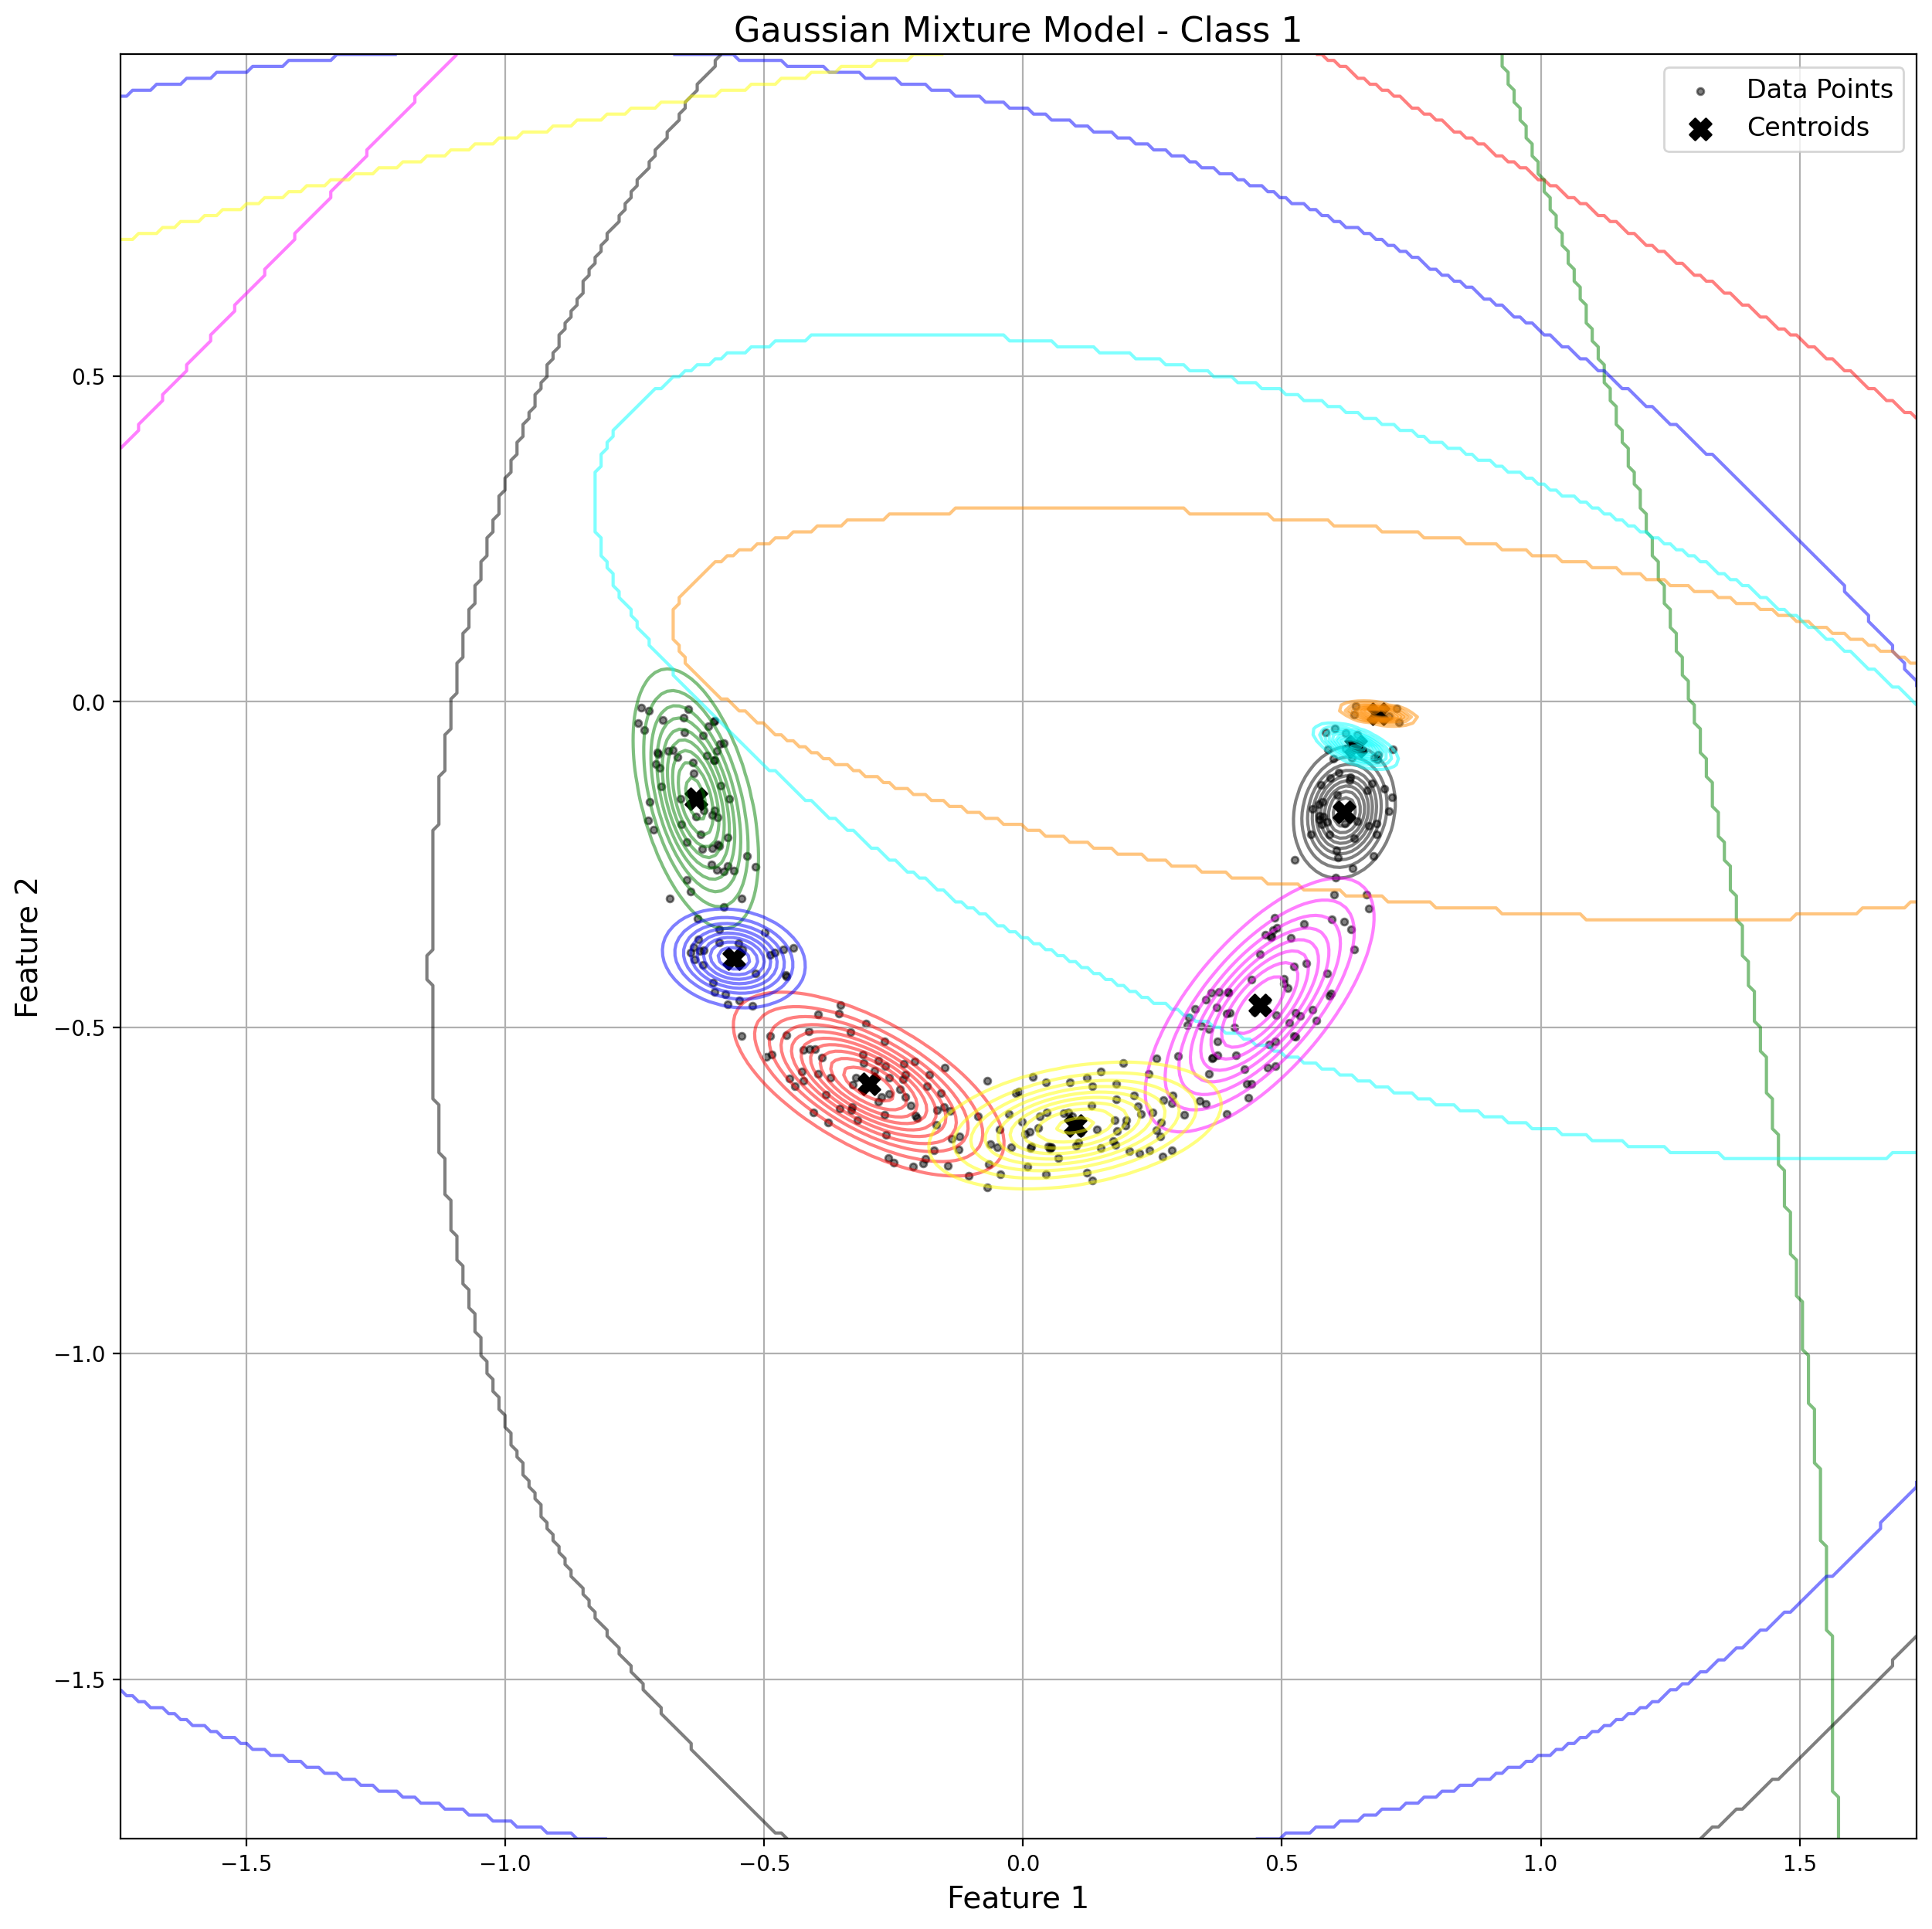

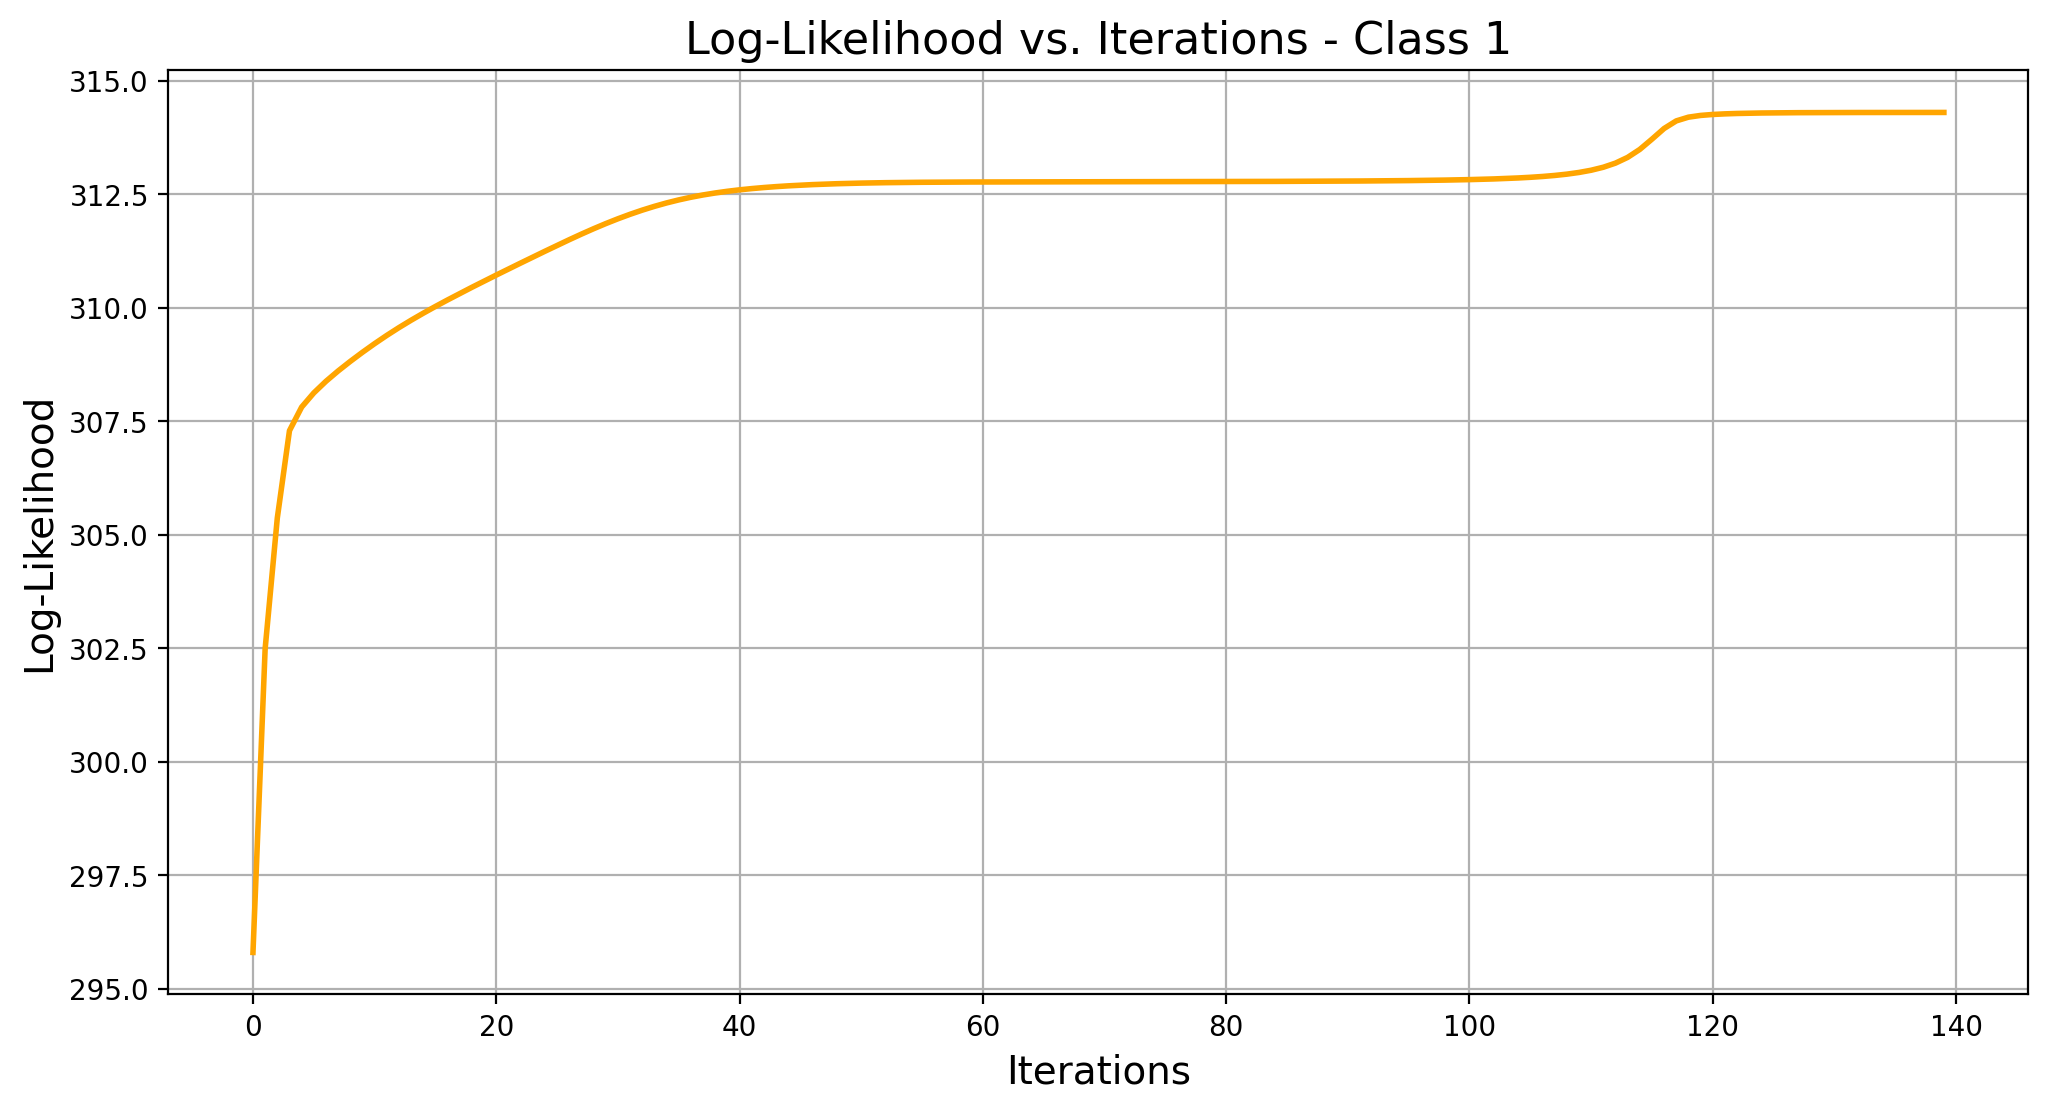

In [523]:
tolerance=1e-4
centroids1, cov_matrices1, cluster_weights1, log_likelihoods1, iterations1 = fit_k_gaussians(data1, centroids1, cov_matrices1, cluster_weights1, tolerance)
print(f"Class 1 converged in {iterations1} iterations.")
plot_results(log_likelihoods1, data1, centroids1, cov_matrices1, cluster_weights1, "Class 1", len(centroids1))
plot_log_likelihood(log_likelihoods1, "Class 1")

Class 2 converged in 582 iterations.


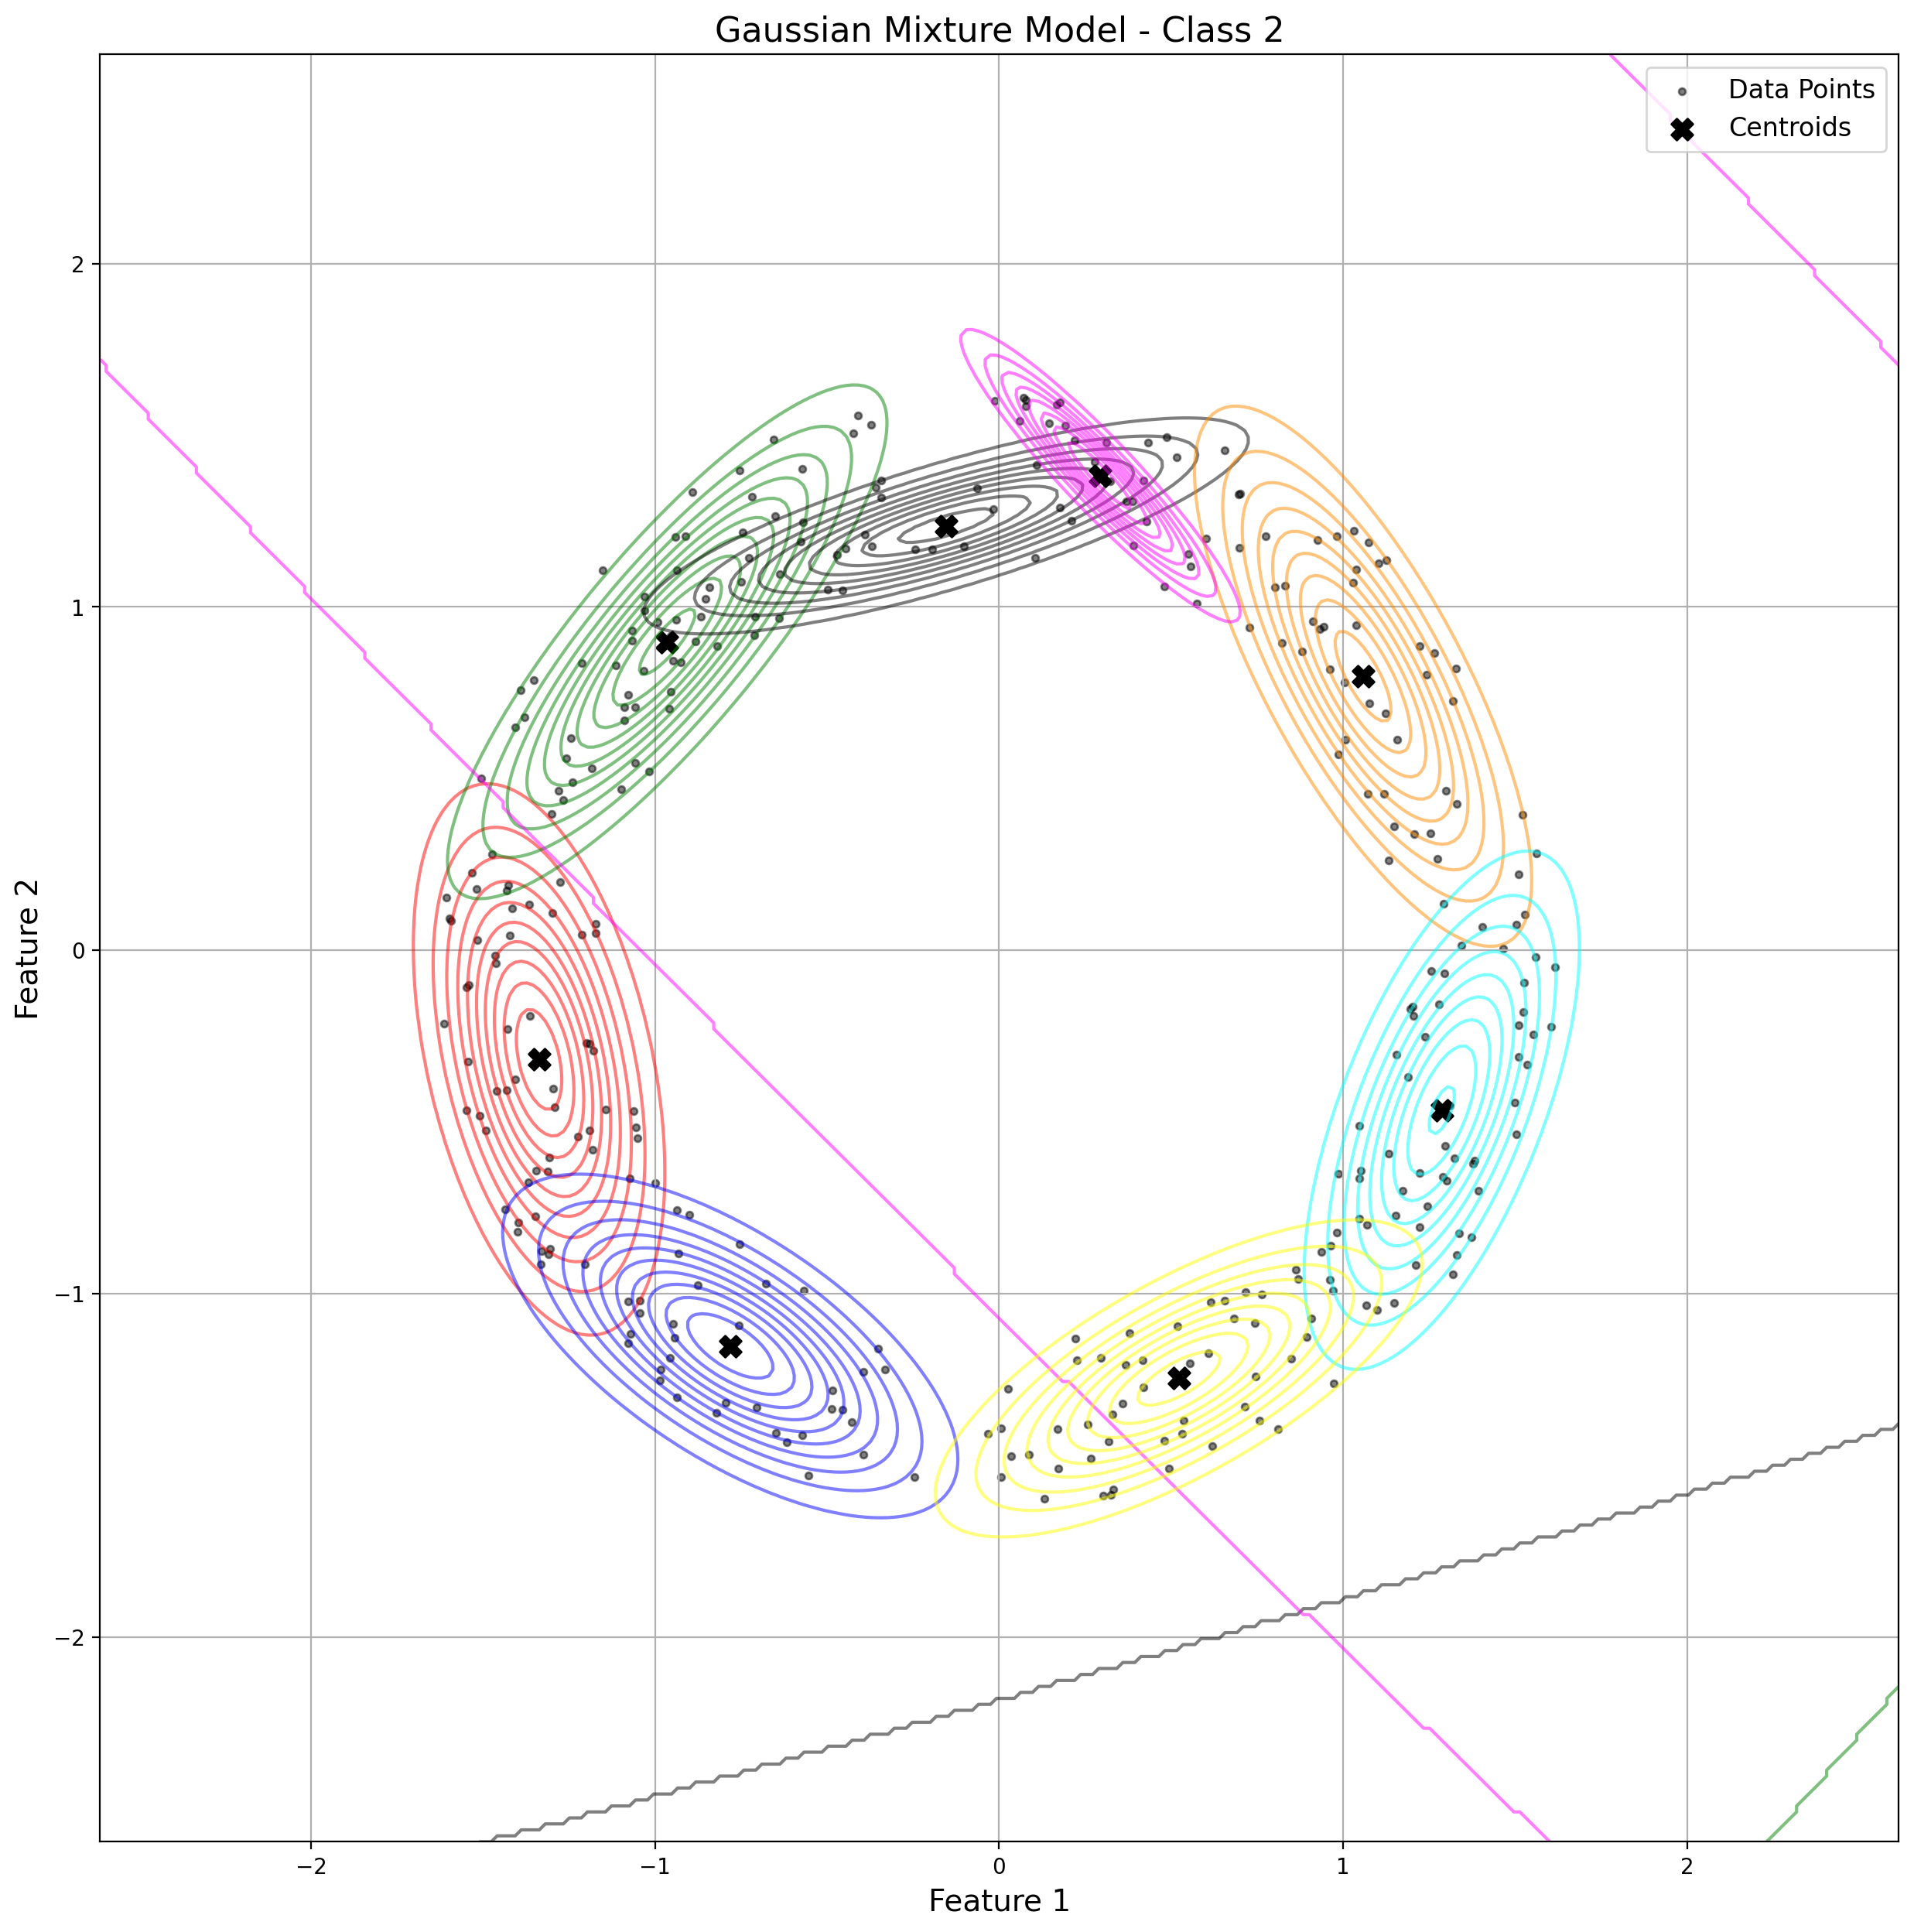

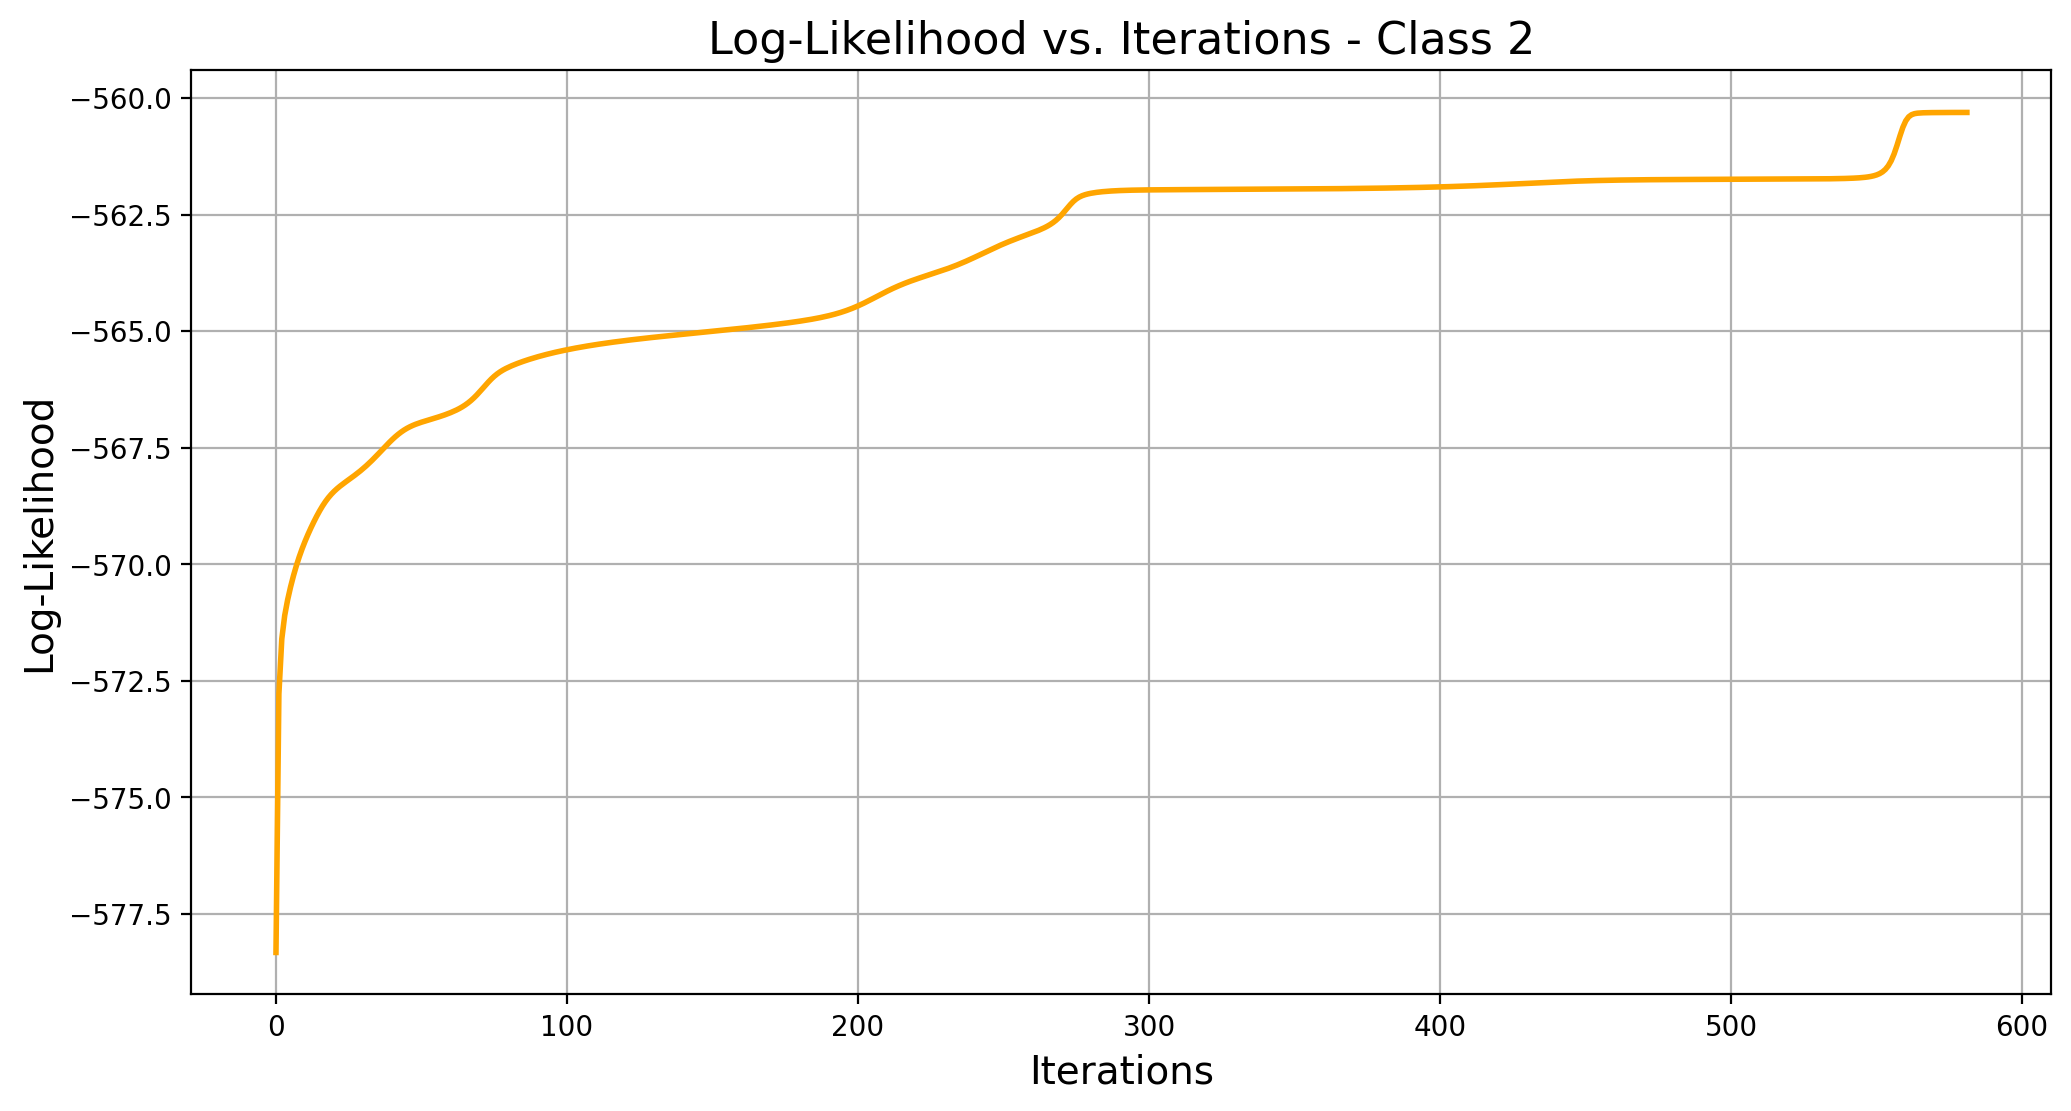

In [524]:
centroids2, cov_matrices2, cluster_weights2, log_likelihoods2, iterations2 = fit_k_gaussians(data2, centroids2, cov_matrices2, cluster_weights2, tolerance)
print(f"Class 2 converged in {iterations2} iterations.")
plot_results(log_likelihoods2, data2, centroids2, cov_matrices2, cluster_weights2, "Class 2", len(centroids2))
plot_log_likelihood(log_likelihoods2, "Class 2")

Class 3 converged in 30 iterations.


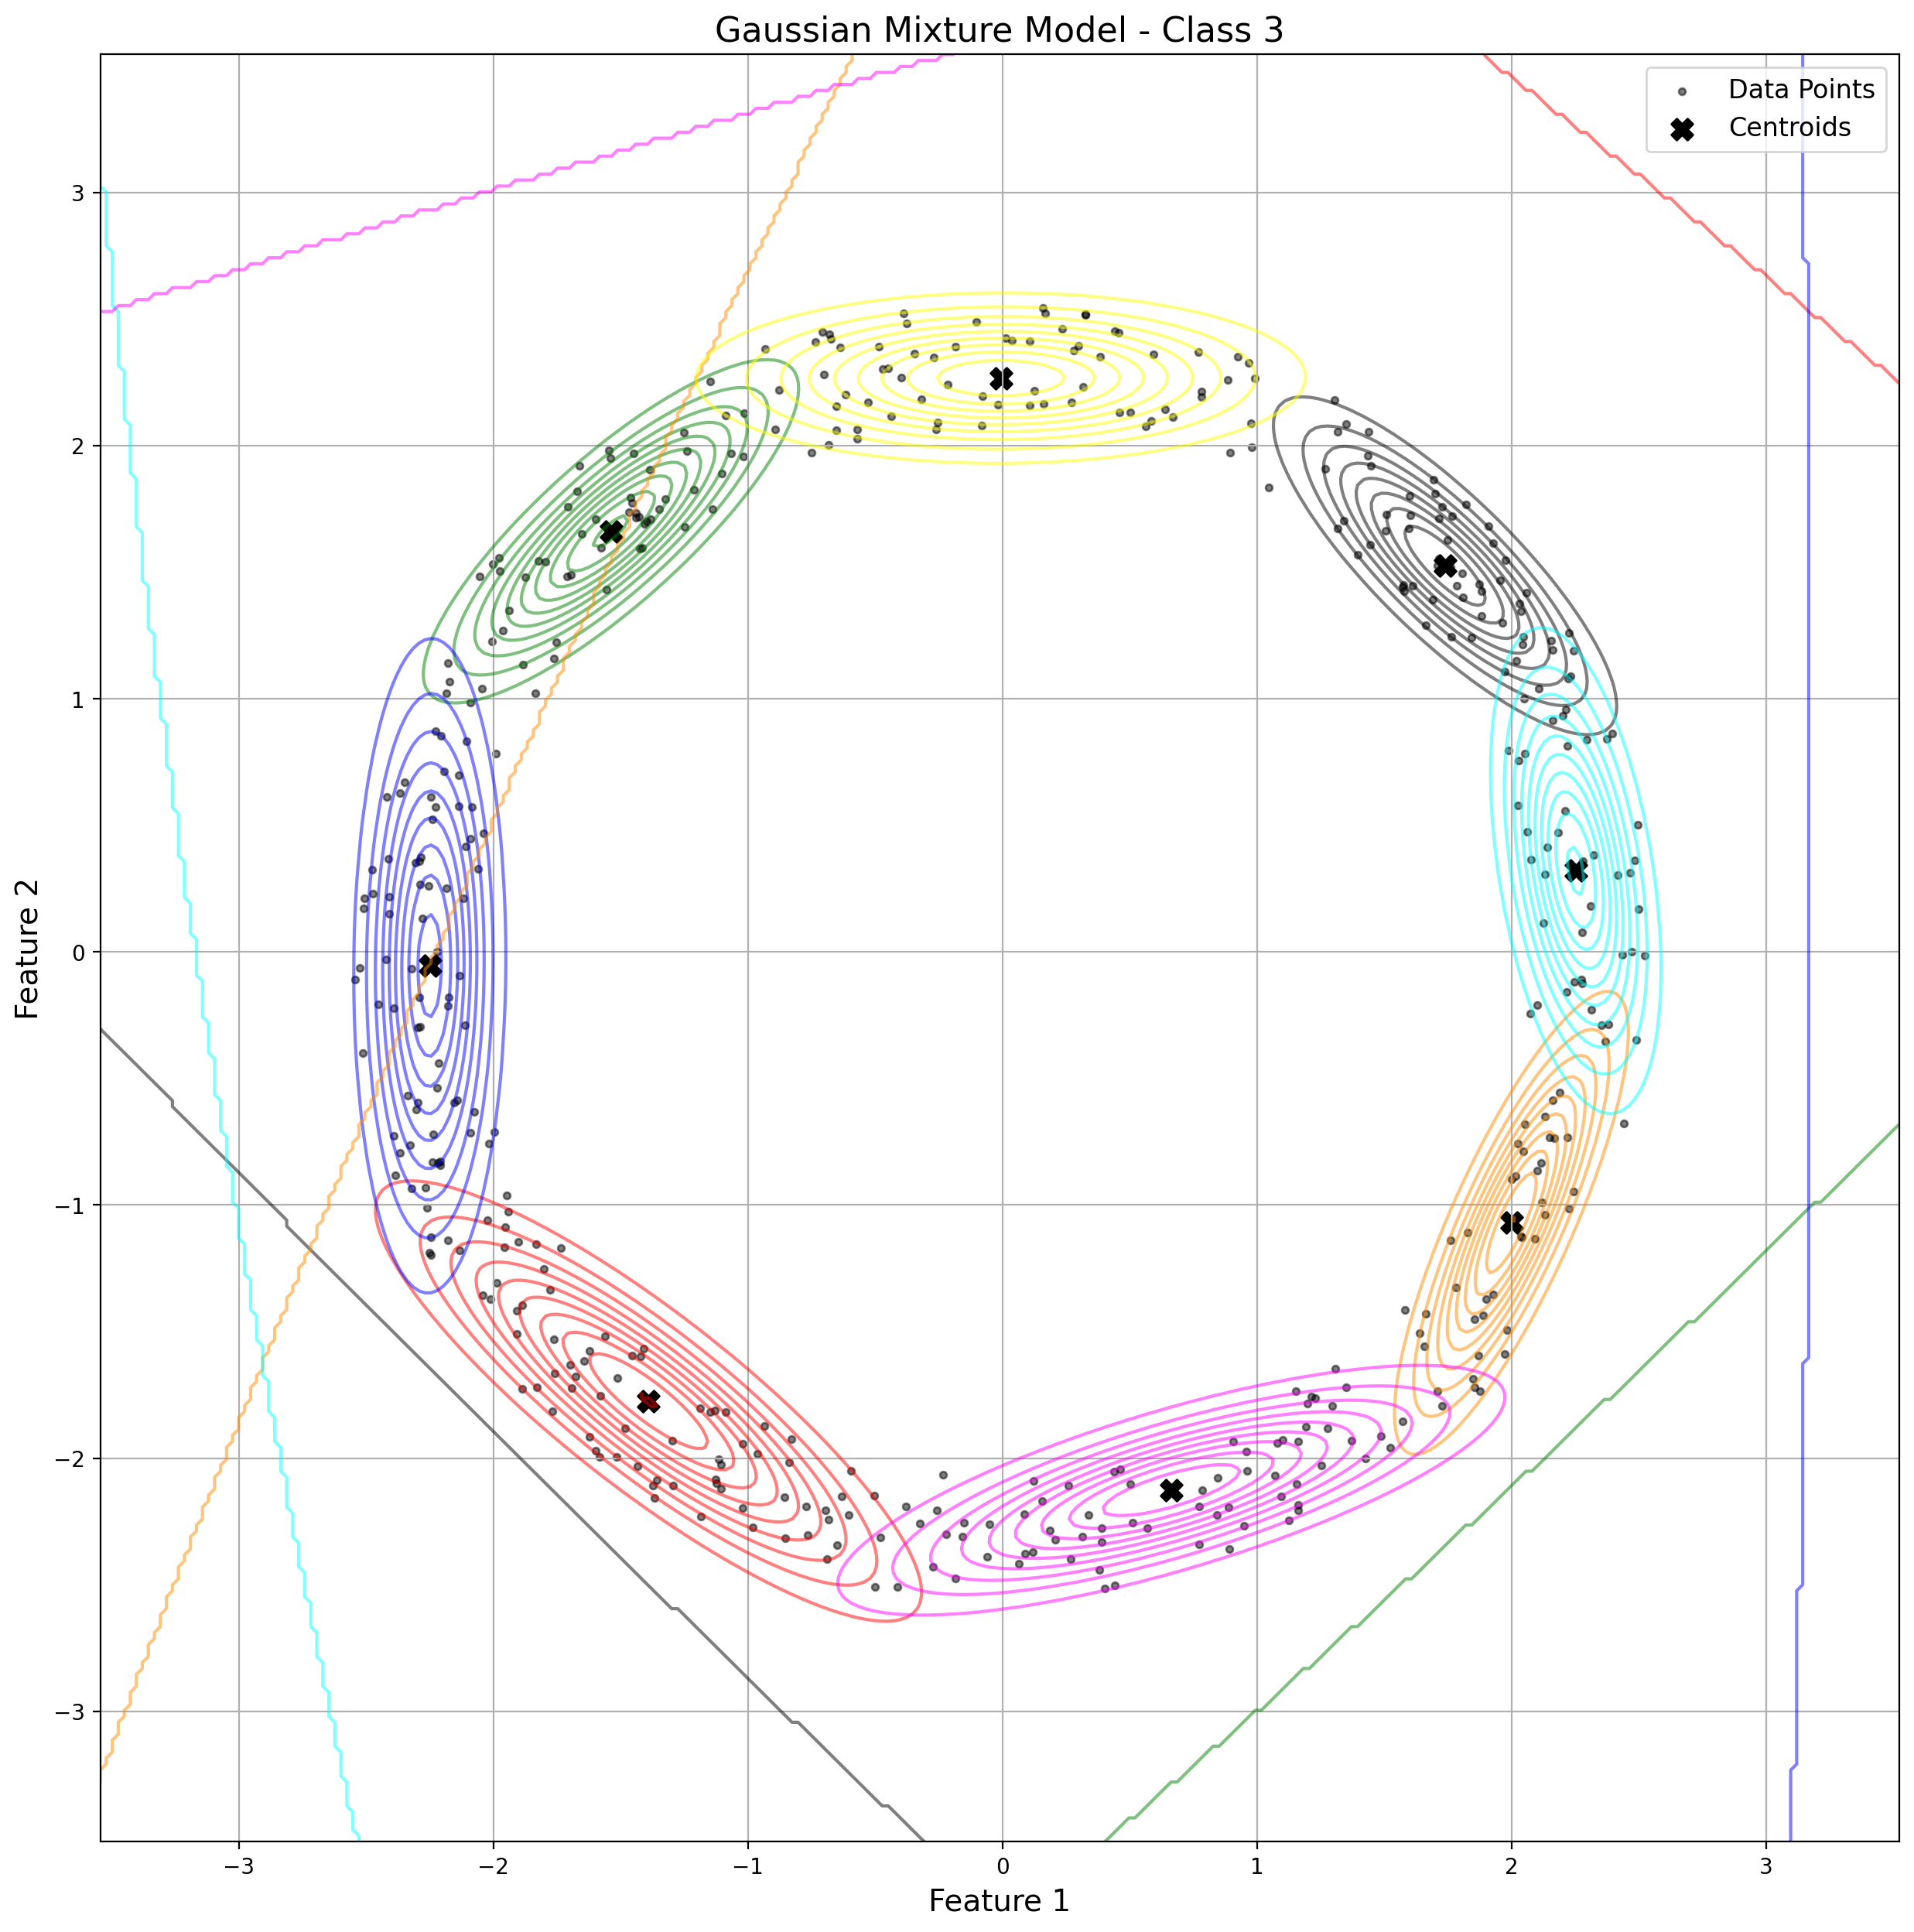

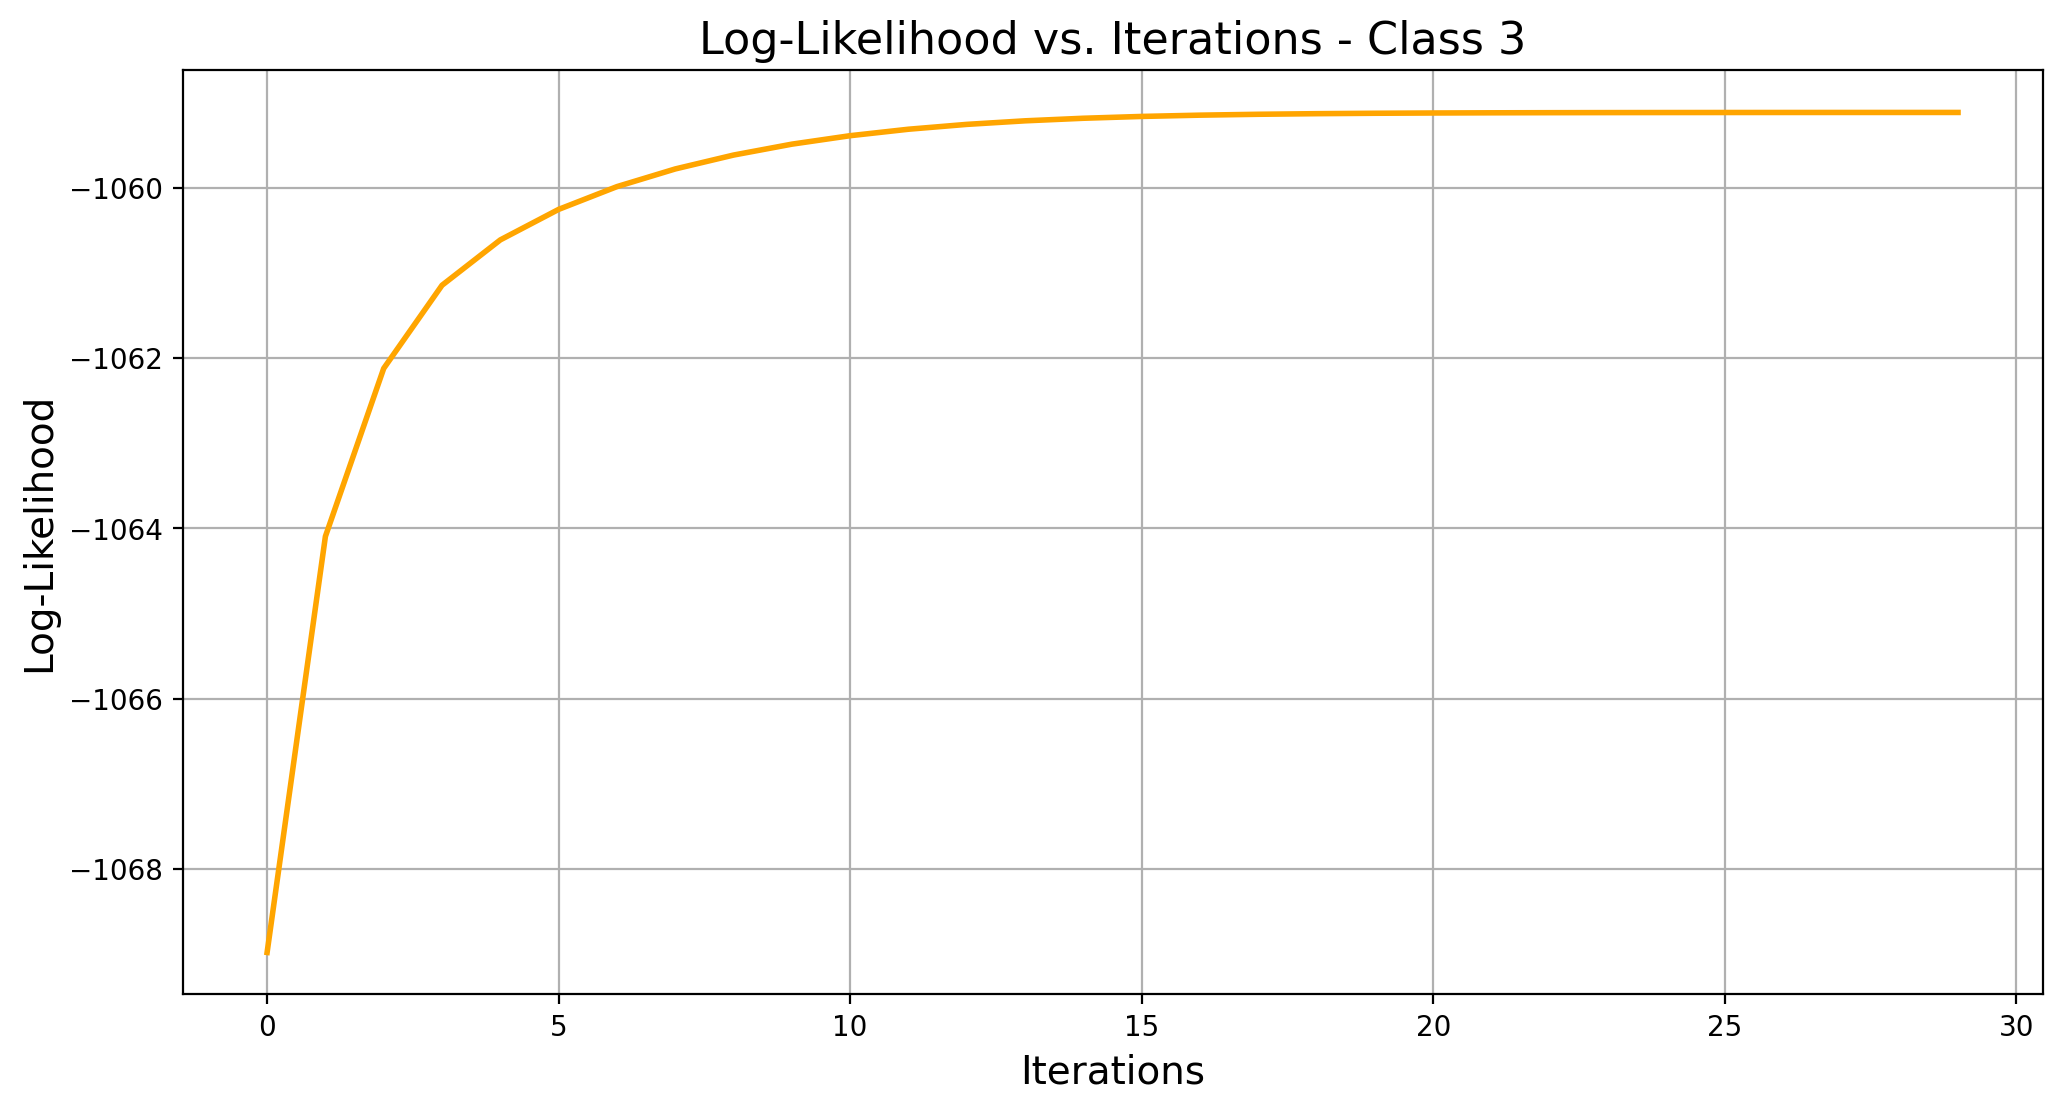

In [525]:
centroids3, cov_matrices3, cluster_weights3, log_likelihoods3, iterations3 = fit_k_gaussians(data3, centroids3, cov_matrices3, cluster_weights3, tolerance)
print(f"Class 3 converged in {iterations3} iterations.")
plot_results(log_likelihoods3, data3, centroids3, cov_matrices3, cluster_weights3, "Class 3", len(centroids3))
plot_log_likelihood(log_likelihoods3, "Class 3")

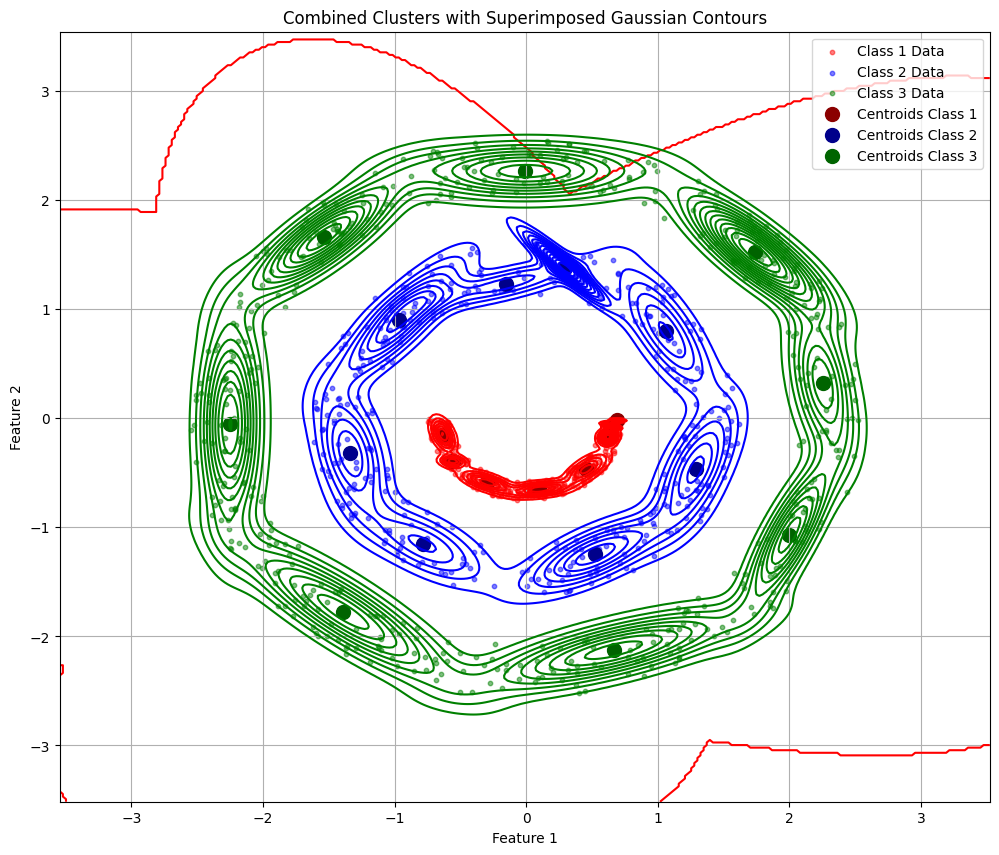

In [526]:
import numpy as np
import matplotlib.pyplot as plt

def plot_combined_clusters(data1, data2, data3, centroids1, centroids2, centroids3, 
                           cov_matrices1, cov_matrices2, cov_matrices3, 
                           cluster_weights1, cluster_weights2, cluster_weights3, 
                           k_clusters):

    # Combine the data to get the limits
    all_data = np.vstack((data1, data2, data3))
    x_min, x_max = np.min(all_data[:, 0]), np.max(all_data[:, 0])
    y_min, y_max = np.min(all_data[:, 1]), np.max(all_data[:, 1])

    # Define a grid for contour plotting
    X, Y = np.meshgrid(np.linspace(x_min - 1, x_max + 1, 300), 
                       np.linspace(y_min - 1, y_max + 1, 300))
    Z1 = np.zeros_like(X)
    Z2 = np.zeros_like(X)
    Z3 = np.zeros_like(X)

    # Function to calculate the Gaussian density
    def multivariate_gaussian(X, mu, cov):
        size = len(mu)
        det = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det))
        X_mu = X - mu
        inv = np.linalg.inv(cov)
        result = np.einsum('...i,ij,...j->...', X_mu, inv, X_mu)
        return norm_const * np.exp(-0.5 * result)

    # Loop over the clusters and compute densities for each class
    for i in range(k_clusters):
        if i < len(centroids1):
            mean1 = centroids1[i]
            cov1 = cov_matrices1[i]
            weight1 = cluster_weights1[i]
            Z1 += weight1 * multivariate_gaussian(np.dstack((X, Y)), mean1, cov1)

        if i < len(centroids2):
            mean2 = centroids2[i]
            cov2 = cov_matrices2[i]
            weight2 = cluster_weights2[i]
            Z2 += weight2 * multivariate_gaussian(np.dstack((X, Y)), mean2, cov2)

        if i < len(centroids3):
            mean3 = centroids3[i]
            cov3 = cov_matrices3[i]
            weight3 = cluster_weights3[i]
            Z3 += weight3 * multivariate_gaussian(np.dstack((X, Y)), mean3, cov3)

    # Plot the contours for each class
    plt.figure(figsize=(12, 10))

    # Class 1 contours (Red)
    plt.contour(X, Y, Z1, levels=np.linspace(0, np.max(Z1), 15), colors='red', linewidths=1.5, alpha=1.0)  
    # Class 2 contours (Blue)
    plt.contour(X, Y, Z2, levels=np.linspace(0, np.max(Z2), 15), colors='blue', linewidths=1.5, alpha=1.0)  
    # Class 3 contours (Green)
    plt.contour(X, Y, Z3, levels=np.linspace(0, np.max(Z3), 15), colors='green', linewidths=1.5, alpha=1.0)  

    # Plot data points with distinct colors for each class
    plt.scatter(data1[:, 0], data1[:, 1], c='red', s=10, label='Class 1 Data', alpha=0.5)
    plt.scatter(data2[:, 0], data2[:, 1], c='blue', s=10, label='Class 2 Data', alpha=0.5)
    plt.scatter(data3[:, 0], data3[:, 1], c='green', s=10, label='Class 3 Data', alpha=0.5)

    # Plot centroids for each class
    plt.scatter(centroids1[:, 0], centroids1[:, 1], c='darkred', s=100, marker='o', label='Centroids Class 1')
    plt.scatter(centroids2[:, 0], centroids2[:, 1], c='darkblue', s=100, marker='o', label='Centroids Class 2')
    plt.scatter(centroids3[:, 0], centroids3[:, 1], c='darkgreen', s=100, marker='o', label='Centroids Class 3')

    # Set limits based on data points
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)
    plt.title('Combined Clusters with Superimposed Gaussian Contours')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage:
plot_combined_clusters(data1, data2, data3, centroids1, centroids2, centroids3, 
        cov_matrices1, cov_matrices2, cov_matrices3, 
                       cluster_weights1, cluster_weights2, cluster_weights3, 
                       k)


In [527]:
def gaussian_pdf(x, mean, cov):
    n = x.shape[1]
    try:
        cov_inv = np.linalg.inv(cov)
    except np.linalg.LinAlgError:
        # Regularize covariance matrix if singular
        cov += 1e-6 * np.eye(n)
        cov_inv = np.linalg.inv(cov)
    diff = x - mean
    exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
    denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    return np.exp(-0.5 * exponent) / denominator
test_labels1 = np.zeros(len(test_data1), dtype=int)
test_labels2 = np.ones(len(test_data2), dtype=int)
test_labels3 = np.full(len(test_data3), 2, dtype=int)
test_data_combined = np.vstack((test_data1, test_data2, test_data3))
test_labels_combined = np.hstack((test_labels1, test_labels2, test_labels3))

In [528]:
import numpy as np

def confusion_matrix(true_labels, pred_labels, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        cm[t][p] += 1
    return cm

def precision_recall_f1(cm):
    num_classes = cm.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    
    for i in range(num_classes):
        TP = cm[i, i]  # True positives for class i
        FP = np.sum(cm[:, i]) - TP  # False positives for class i
        FN = np.sum(cm[i, :]) - TP  # False negatives for class i
        
        precision[i] = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
        if precision[i] + recall[i] > 0:
            f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        else:
            f1[i] = 0

    return precision, recall, f1

def classify(data, class_params):
    class_probs = []
    for means, covariances, mixing_coeffs in class_params:
        k = len(means)
        class_prob = np.sum([mixing_coeffs[j] * gaussian_pdf(data, means[j], covariances[j])
                             for j in range(k)], axis=0)
        class_probs.append(class_prob)

    return np.argmax(class_probs, axis=0)

def predict_gmm(gmm_params, test_data):
    predictions = classify(test_data, gmm_params)
    return predictions


gmm_params = [[centroids1, cov_matrices1, cluster_weights1], 
              [centroids2, cov_matrices2, cluster_weights2], 
              [centroids3, cov_matrices3, cluster_weights3]]


predictions = predict_gmm(gmm_params, test_data_combined)


accuracy = np.mean(predictions == test_labels_combined)
print(f"Accuracy: {accuracy:.2f}")


cm = confusion_matrix(test_labels_combined, predictions, num_classes=3)
print("Confusion Matrix:")
print(cm)


precision, recall, f1 = precision_recall_f1(cm)

for i in range(3):
    print(f"Class {i+1} -> Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-Score: {f1[i]:.2f}")


Accuracy: 1.00
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 211]]
Class 1 -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 2 -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 3 -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00


# 